# To predict diabetes using PIMA diabetes data

In [3]:
##Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

## 1. Import libraries and load the dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
# Load the dataset
diabetes = pd.read_csv('E:/data science/capstone Projects/Additional projects/Diabetic Prediction/diabetes.csv')

## 2. EDA

### 2.1 Understanding the variables

In [7]:
# Print the first 5 rows of the dataset
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# Find the number of rows and columns in the dataset
diabetes.shape

(768, 9)

In [9]:
# Get the info of all features in the dataset 
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# Statistical summary
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Observation:
In the above table, the min value of columns `Glucose`, `BloodPressure`, `SkinThickness`, `Inssulin`, `BMI` are zero (0) values. It is clear that those value can not be zero. Therefore, I am going to impute the values of these respective columns instead of zero in the next step.

### 2.2 Data cleaning

#### 2.2.1 Drop the duplicates: 
To check if there is any duplicate rows are exist or not, if exist then we should remove from the dataset

In [11]:
# Check the shape before drop the duplicates
diabetes.shape

(768, 9)

In [12]:
diabetes=diabetes.drop_duplicates()

In [13]:
# Check the shape after drop the duplicates
diabetes.shape

(768, 9)

Before drop and after the duplicates the dataset has same shape which means no duplicates in the dataset

#### 2.2.2 Check the NULL values

In [14]:
# Check if any null value is present
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no NULL values in the given dataset

#### 2.2.3 Deal with the Zero values in the dataset

In [15]:
# Find the number of zero value in the features: `Glucose`, `BloodPressure`, `SkinThickness`, `Inssulin`, `BMI`
print('No. of zero values in Glucose is',diabetes[diabetes['Glucose']==0].shape[0])
print('No. of zero values in BloodPressure is',diabetes[diabetes['BloodPressure']==0].shape[0])
print('No. of zero values in SkinThickness is',diabetes[diabetes['SkinThickness']==0].shape[0])
print('No. of zero values in Insulin is',diabetes[diabetes['Insulin']==0].shape[0])
print('No. of zero values in BMI is',diabetes[diabetes['BMI']==0].shape[0])

No. of zero values in Glucose is 5
No. of zero values in BloodPressure is 35
No. of zero values in SkinThickness is 227
No. of zero values in Insulin is 374
No. of zero values in BMI is 11


In [18]:
# Replace the zero values with mean of that columns
diabetes['Glucose']=diabetes['Glucose'].replace(0,diabetes['Glucose'].mean())
diabetes['BloodPressure']=diabetes['BloodPressure'].replace(0,diabetes['BloodPressure'].mean())
diabetes['SkinThickness']=diabetes['SkinThickness'].replace(0,diabetes['SkinThickness'].mean())
diabetes['Insulin']=diabetes['Insulin'].replace(0,diabetes['Insulin'].mean())
diabetes['BMI']=diabetes['BMI'].replace(0,diabetes['BMI'].mean())

In [19]:
# Check with statiscal summary
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### 2.2.4 Check the imbalanced dataset

In [20]:
diabetes["Outcome"].value_counts().to_frame()

,Outcome
0,500
1,268


In [21]:
diabetes["Outcome"].value_counts(normalize=True).to_frame()

,Outcome
0,0.651042
1,0.348958


0 -> Non-diabetic. 1 -> Diabetic. Only 34.8% people which have diabete. So the data suffers from data imbalance but it is not severe which is why I will not consider techniques like sampling to tackle the imbalance

## 3. Data visualization

#### 3.1 Histogram

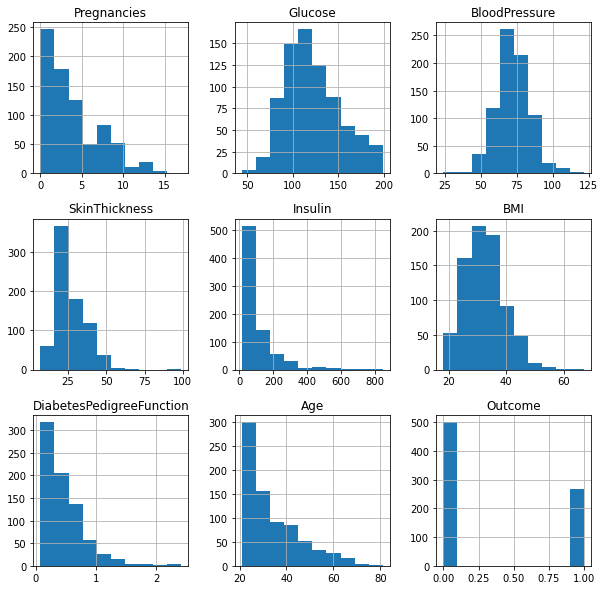

In [22]:
# Histogram of each feature
diabetes.hist(figsize = (10,10),bins=10)
plt.show()

#### 3.2 Analyzing relationships between variables

In [23]:
#Correlation

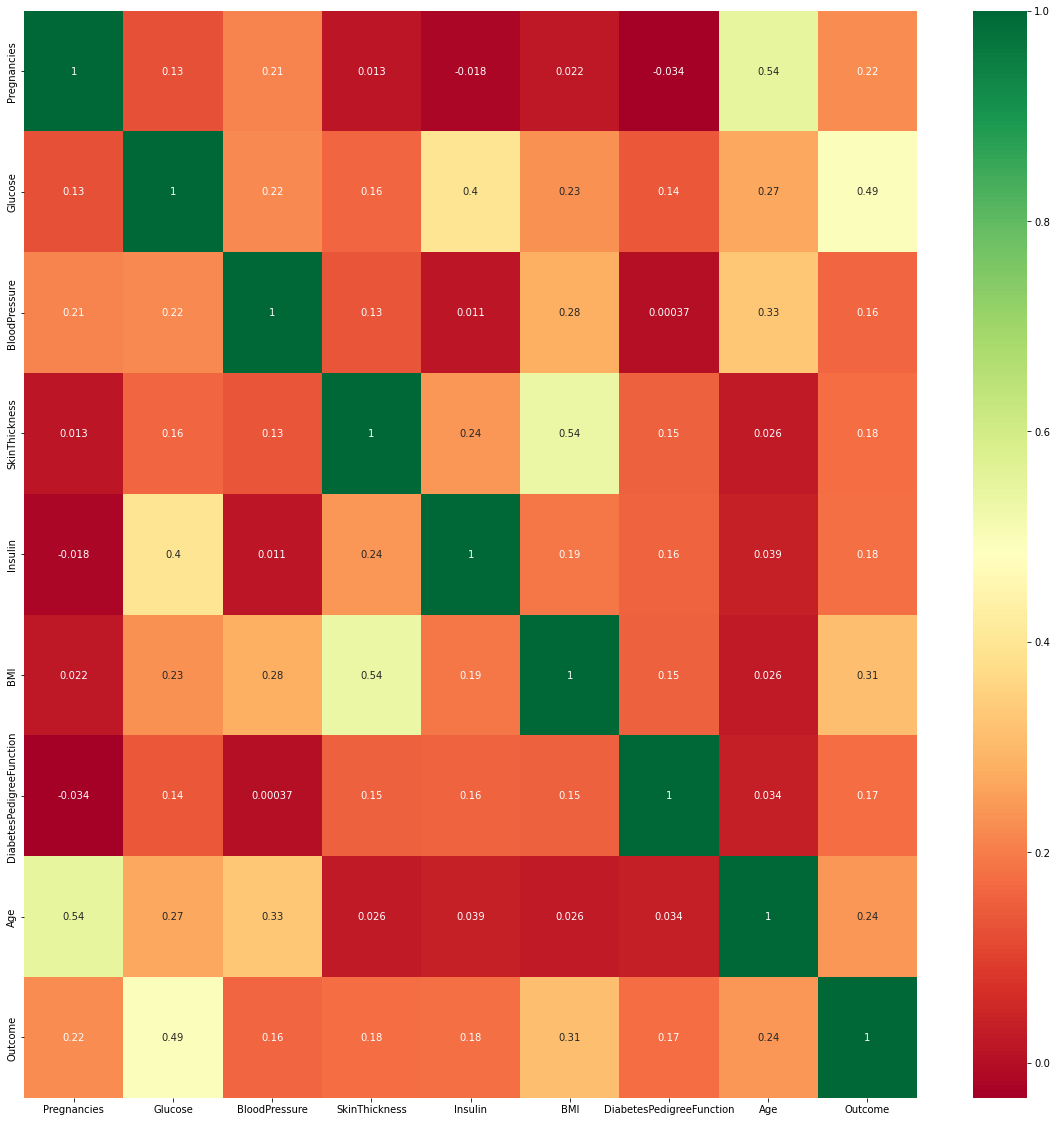

In [24]:
# get correlation of each features in dataset
cormat = diabetes.corr()
top_corr_features = cormat.index
plt.figure(figsize=(20,20))
# plot heat map
g = sns.heatmap(diabetes[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [25]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


## 4. Split the data frame into X and y

In [26]:
target_name = 'Outcome'

# Separate object for target feature
y = diabetes[target_name]

# Separate object for input features

X = diabetes.drop(target_name, axis=1)

In [27]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [28]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## 5. Apply Feature Scaling
There are some feature scaling: StandardScaler, Normalizer, Minmax Scaler and Binarizer. In this project, I use StandardScaler for scaling the feature.

In [29]:
# Apply Stadard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
SSX = scaler.transform(X)

## 6. Train test split

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(SSX, y, test_size=0.2, random_state=7)

In [31]:
X_train.shape, y_train.shape

((614, 8), (614,))

In [32]:
X_test.shape, y_test.shape

((154, 8), (154,))

## 7. Build the Algorithm

### 7.1 Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [35]:
## Making prediction on test dataset
lr_pred=lr.predict(X_test)

In [36]:
# Train score and Test score of Logistic Regression
from sklearn.metrics import accuracy_score
print("Train accuracy of Logistic Regression is", lr.score(X_train, y_train))
print("Accuracy (Test) score of Logistic Regression is", lr.score(X_test, y_test))
print("Accuracy (Test) score of Logistic Regression is", accuracy_score(y_test, lr_pred))

Train accuracy of Logistic Regression is 0.7752442996742671
Accuracy (Test) score of Logistic Regression is 0.7727272727272727
Accuracy (Test) score of Logistic Regression is 0.7727272727272727


### 7.2 KNeighborsClassifier (KNN)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
## Making prediction on test dataset
knn_pred=knn.predict(X_test)

In [39]:
# Train score and Test score of KNN
print("Train accuracy of KNN is", knn.score(X_train, y_train))
print("Accuracy (Test) score of KNN is", knn.score(X_test, y_test))
print("Accuracy (Test) score of KNN is", accuracy_score(y_test, knn_pred))

Train accuracy of KNN is 0.8110749185667753
Accuracy (Test) score of KNN is 0.7467532467532467
Accuracy (Test) score of KNN is 0.7467532467532467


### 7.3 Naive-Bayes Classifier

In [40]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [41]:
## Making prediction on test dataset
nb_pred=nb.predict(X_test)

In [42]:
# Train score and Test score of Naive-Bayes
print("Train accuracy of Naive-Bayes is", nb.score(X_train, y_train))
print("Accuracy (Test) score of Naive-Bayes is", nb.score(X_test, y_test))
print("Accuracy (Test) score of Naive-Bayes is", accuracy_score(y_test, nb_pred))

Train accuracy of Naive-Bayes is 0.742671009771987
Accuracy (Test) score of Naive-Bayes is 0.7402597402597403
Accuracy (Test) score of Naive-Bayes is 0.7402597402597403


### 7.4 Support Vector Machine

In [43]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train, y_train)

SVC()

In [44]:
## Making prediction on test dataset
sv_pred=sv.predict(X_test)

In [45]:
# Train score and Test score of SVM
print("Train accuracy of SVM is", sv.score(X_train, y_train))
print("Accuracy (Test) score of SVM is", sv.score(X_test, y_test))
print("Accuracy (Test) score of SVM is", accuracy_score(y_test, sv_pred))

Train accuracy of SVM is 0.8192182410423453
Accuracy (Test) score of SVM is 0.8311688311688312
Accuracy (Test) score of SVM is 0.8311688311688312


### 7.5 Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
## Making prediction on test dataset
dt_pred=dt.predict(X_test)

In [48]:
# Train score and Test score of Decision Tree
print("Train accuracy of Decision Tree is", dt.score(X_train, y_train))
print("Accuracy (Test) score of Decision Tree is", dt.score(X_test, y_test))
print("Accuracy (Test) score of Decision Tree is", accuracy_score(y_test, dt_pred))

Train accuracy of Decision Tree is 1.0
Accuracy (Test) score of Decision Tree is 0.8116883116883117
Accuracy (Test) score of Decision Tree is 0.8116883116883117


### 7.6 Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [52]:
## Making prediction on test dataset
rf_pred=rf.predict(X_test)

In [53]:
# Train score and Test score of Random Forest
print("Train accuracy of Random Forest is", rf.score(X_train, y_train))
print("Accuracy (Test) score of Random Forest is", rf.score(X_test, y_test))
print("Accuracy (Test) score of Random Forest is", accuracy_score(y_test, rf_pred))

Train accuracy of Random Forest is 1.0
Accuracy (Test) score of Random Forest is 0.7792207792207793
Accuracy (Test) score of Random Forest is 0.7792207792207793


In [55]:
###Confusion Matrix

Confusion metrics is a table which is used to describe the performance of a classification problem.

It visualizes the accuracy of a classifier by comparing predicted values with actual values

The terms used in confusion metrics are true positive (TP), true negative (TN), false positive (FP) and false negative (FN)

1. True Positive: The predicted result is positive, while it is labeled as positive
2. False Postitive: The predicted result is positive, while it is labeled as negative
3. False Negative: The predicted result is negative, while it is labeled as positive
4. True Negative: The predicted result is negative, while it is labled as negative

#### Confusion Matrix of "Logistic Regression"

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
# confusion matrix of Logistic Regression
cm=confusion_matrix(y_test,lr_pred)
cm

array([[86, 11],
       [24, 33]], dtype=int64)

##### Classification Report of Logistic Regression

In [57]:
print('Clasification Report of Logistic Regression: \n', classification_report(y_test,lr_pred,digits=4))

Clasification Report of Logistic Regression: 
               precision    recall  f1-score   support

           0     0.7818    0.8866    0.8309        97
           1     0.7500    0.5789    0.6535        57

    accuracy                         0.7727       154
   macro avg     0.7659    0.7328    0.7422       154
weighted avg     0.7700    0.7727    0.7652       154



##### ROC Curve & ROC AUC

ROC curve is one of the important evaluating metrics that should be used to check the performance of an classification model. It is als called relative operating characteristic curve, because it is a comparison of two main characteristics (TPR and FPR). It is plotted between sensitivity (a.k.a recall a.k.a True Positive Rate) and False Positive Rate (FPR = 1 - Specitivity)  

ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g if a patient has a disease or not) 

Area under Curve (AUC) helps us to choose the best model amongst the models for which we have plotted the ROC curves

In [58]:
# Area Under Curve
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_test, lr_pred)
print("ROC AUC SCORE of Logistic Regression is",auc)

ROC AUC SCORE of Logistic Regression is 0.7327726532826913


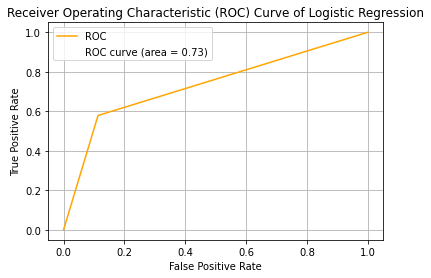

In [59]:
fpr, tpr, thresholds = roc_curve(y_test, lr_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='blue', linestyle='', label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Logistic Regression')
plt.legend()
plt.grid()
plt.show()

### Classification report of KNN

In [60]:
print('Clasification Report of KNN: \n', classification_report(y_test,knn_pred,digits=4))

Clasification Report of KNN: 
               precision    recall  f1-score   support

           0     0.7736    0.8454    0.8079        97
           1     0.6875    0.5789    0.6286        57

    accuracy                         0.7468       154
   macro avg     0.7305    0.7122    0.7182       154
weighted avg     0.7417    0.7468    0.7415       154



#### CLasssification report for SVM

In [62]:
print('Clasification Report of SVM: \n', classification_report(y_test,sv_pred,digits=4))

Clasification Report of SVM: 
               precision    recall  f1-score   support

           0     0.8198    0.9381    0.8750        97
           1     0.8605    0.6491    0.7400        57

    accuracy                         0.8312       154
   macro avg     0.8401    0.7936    0.8075       154
weighted avg     0.8349    0.8312    0.8250       154



In [63]:
# Area Under Curve
auc = roc_auc_score(y_test, sv_pred)
print("ROC AUC SCORE of SVM is",auc)

ROC AUC SCORE of SVM is 0.7936335684572255


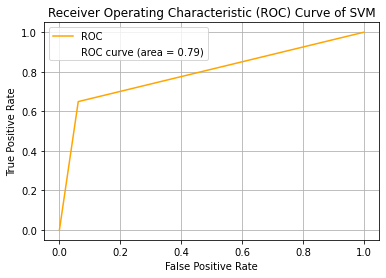

In [64]:
fpr, tpr, thresholds = roc_curve(y_test, sv_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='blue', linestyle='', label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of SVM')
plt.legend()
plt.grid()
plt.show()